# **Data Description**

| Feature | Definition | Key | 
|:---|:---|:---|
| PassengerId | Unique ID of the passenger |  |
| Survived | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Name of the passenger |  |
| Sex | Sex |  |
| Age | Age in years |  |
| SibSp | # of siblings / spouses aboard the Titanic |  |
| Parch | # of parents / children aboard the Titanic |  |
| Ticket | Ticket number |  |
| Fare | Passenger fare |  |
| Cabin | Cabin number |  |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


* Data Dictionary

    * `pclass`: A proxy for socio-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    * `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    * `sibsp`: The dataset defines family relations in this way...
        + Sibling = brother, sister, stepbrother, stepsister
        + Spouse = husband, wife (mistresses and fiancés were ignored)

    * `parch`: The dataset defines family relations in this way...
        + Parent = mother, father
        + Child = daughter, son, stepdaughter, stepson
        + Some children travelled only with a nanny, therefore parch=0 for them.




# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# **Reading and Exploring Data**

In [2]:
data = pd.read_csv('Titanic_train_data.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Duplicate Values**

In [6]:
data.duplicated().sum()

0

# **Missing Values**

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# The percentage of missing values in the data
round(data.isnull().mean()*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
data.Embarked.value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [10]:
data['Embarked'] = data['Embarked'].fillna('S')

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
data.Age.median()

28.0

In [13]:
data.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [14]:
data['Age'] = data.groupby(['Pclass', 'Sex'], group_keys = False)['Age'].apply(lambda x: x.fillna(x.median()))

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)  

* The cabin column is dropped because 77 % of it is missed and the rest of the features are unnecessary

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **Rename Columns**

In [18]:
data.columns = data.columns.str.lower()

In [19]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# **Univariate Analysis**

In [20]:
# This is function to exploring categorical data

def explore_categorical(data, column):
    print(f'\n###################### {column.title()} ######################\n')
    print('The number:')
    print(data[column].value_counts())
    print('----------------------------------------------------')
    print('The percentage:')
    print(data[column].value_counts(normalize = True))
    sns.countplot(data = data, x = column);
    plt.show()


###################### Sibsp ######################

The number:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
----------------------------------------------------
The percentage:
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64


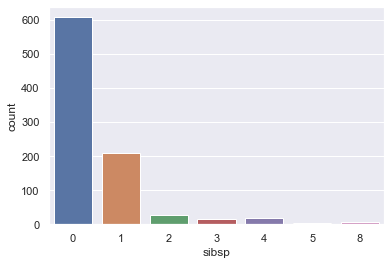


###################### Parch ######################

The number:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
----------------------------------------------------
The percentage:
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64


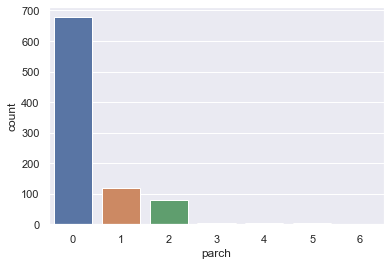


###################### Embarked ######################

The number:
S    646
C    168
Q     77
Name: embarked, dtype: int64
----------------------------------------------------
The percentage:
S    0.725028
C    0.188552
Q    0.086420
Name: embarked, dtype: float64


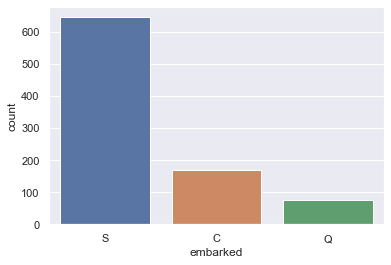


###################### Pclass ######################

The number:
3    491
1    216
2    184
Name: pclass, dtype: int64
----------------------------------------------------
The percentage:
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


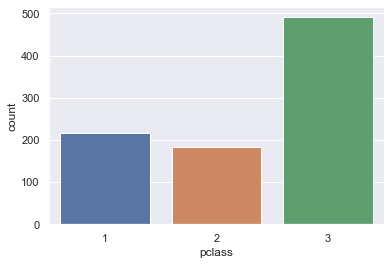


###################### Sex ######################

The number:
male      577
female    314
Name: sex, dtype: int64
----------------------------------------------------
The percentage:
male      0.647587
female    0.352413
Name: sex, dtype: float64


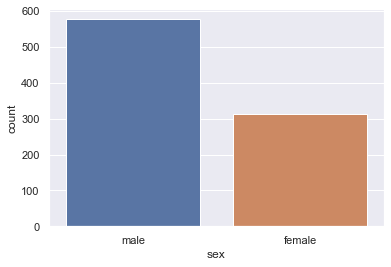


###################### Survived ######################

The number:
0    549
1    342
Name: survived, dtype: int64
----------------------------------------------------
The percentage:
0    0.616162
1    0.383838
Name: survived, dtype: float64


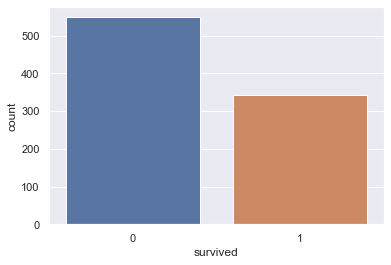

In [21]:
for col in ['sibsp', 'parch', 'embarked', 'pclass', 'sex', 'survived']:
    explore_categorical(data, col)

In [22]:
# This is function to exploring continuous data

def explore_continuous(data, column):
    print(f'\n###################### {column.title()} ######################\n')
    print(data[column].describe())
    sns.histplot(x = column, data = data);
    plt.show()


###################### Age ######################

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64


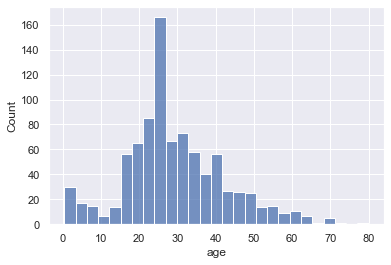


###################### Fare ######################

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


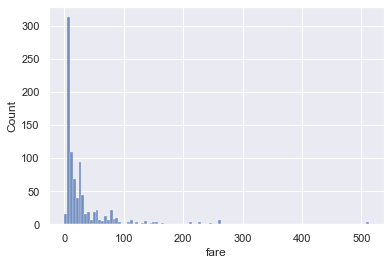

In [23]:
for col in ['age', 'fare']:
    explore_continuous(data, col)

> #####  **Some information**
* Suvival Rate : 38.38%
* More than 55% of the passengers were from 3rd class
* More than 76% of the passengers haven't parents and children
* More than 68% of the passengers haven't siblings and spouses
* More than 72% of passengers rode from the port of Southampton

# **Bivariate Analysis**

In [24]:
# This is function to exploring survival rate for each group

def survival_rate(data, column):
    print(f'\n######## survived & {column} ########')
    print(data.groupby([column]).survived.mean())
    sns.barplot(data = data, x = column, y = 'survived', ci = None);
    #plot horizontal line for overall survival rate
    plt.axhline(data.survived.mean(), color = 'black', linestyle = '--');
    plt.show()


######## survived & pclass ########
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


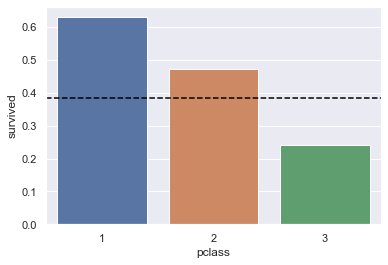


######## survived & sex ########
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


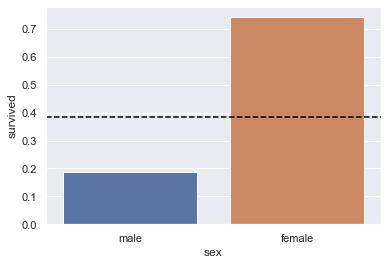


######## survived & sibsp ########
sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


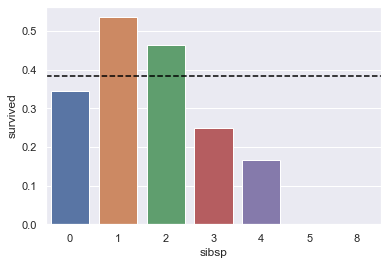


######## survived & parch ########
parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


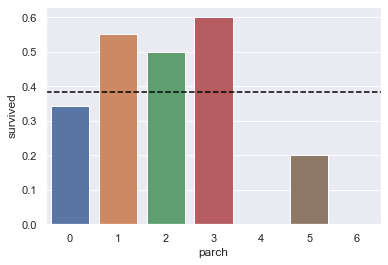


######## survived & embarked ########
embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64


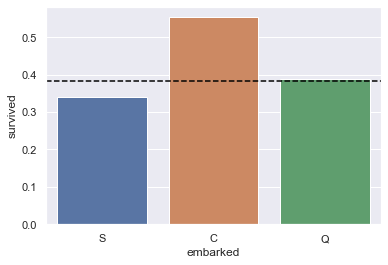

In [25]:
for col in ['pclass', 'sex', 'sibsp', 'parch', 'embarked']:
    survival_rate(data, col)

In [26]:
data.age.describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64

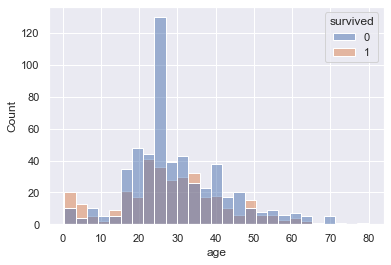

In [27]:
sns.histplot(data = data, x = 'age', hue = 'survived');

In [28]:
data.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

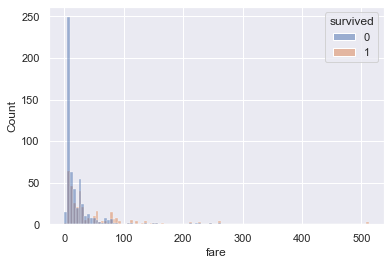

In [29]:
sns.histplot(data = data, x = 'fare', hue = 'survived');

In [30]:
# Split data into:

data_survived = data[data['survived'] == 1]
data_died = data[data.survived == 0]

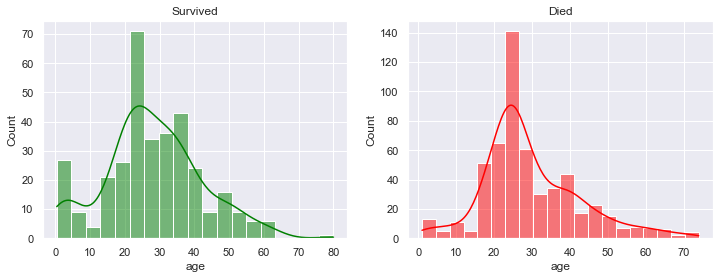

In [31]:
# Subplots for age distribution

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(data = data_survived, x = 'age', ax = ax[0], color = 'green', kde = True)
sns.histplot(data = data_died, x = 'age', ax = ax[1], color = 'red', kde = True)
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

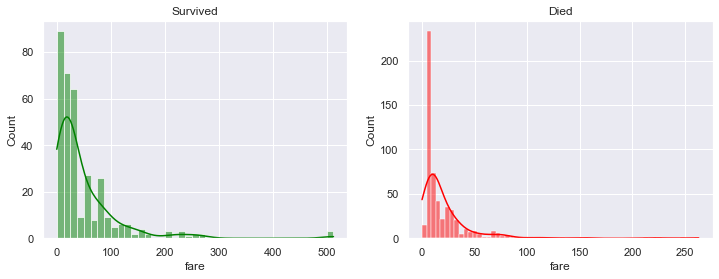

In [32]:
# Subplots for fare distribution

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(data = data_survived, x = 'fare', ax = ax[0], color = 'green', kde = True)
sns.histplot(data = data_died, x = 'fare', ax = ax[1], color = 'red', kde = True)
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

# **Outliers Detection**

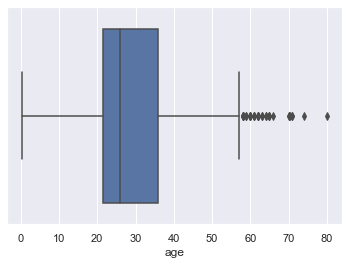

In [33]:
sns.boxplot(data = data, x = 'age');

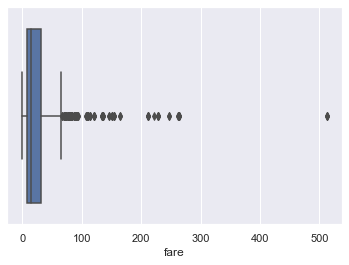

In [34]:
sns.boxplot(data = data, x = 'fare');

* Many outliers in the fare

# Outliers Remove

In [35]:
# Way One -----> We can use the IQR method to remove them.

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (0.5 * IQR)
    upper_bound = Q3 + (0.5 * IQR)
    return data[(data[column] > lower_bound) & (data[column] < upper_bound)]

# data = remove_outliers(data, 'fare')

In [36]:
# Way Two -----> We can also choose a limit according to the distribution of the data. 

data = data[data.fare < 280]

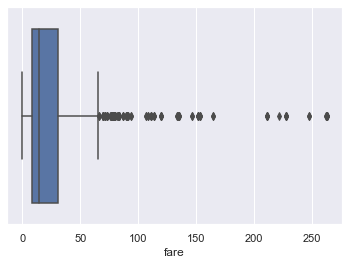

In [37]:
sns.boxplot(data = data, x = 'fare');

In [38]:
data.describe()[['age', 'fare']]

,age,fare
count,888.000000,888.000000
mean,29.091408,30.582164
std,13.321948,41.176366
min,0.420000,0.000000
25%,21.500000,7.895800
50%,26.000000,14.454200
75%,36.000000,30.771850
max,80.000000,263.000000


In [39]:
# Split Age into groups
data['age_group'] = pd.cut(data.age, bins = [0, 22, 27, 37, 81], labels = ['child', 'young', 'adult', 'senior'])

# Split Fare into groups
data['fare_group'] = pd.cut(data.fare, bins = [-0.99, 8, 15, 31, 265], labels = ['low', 'medium', 'high', 'very high'])


######## survived & age_group ########
age_group
child     0.450549
young     0.260000
adult     0.427184
senior    0.363636
Name: survived, dtype: float64


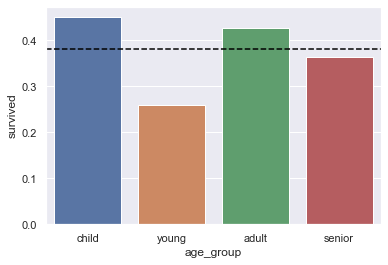


######## survived & fare_group ########
fare_group
low          0.215768
medium       0.285714
high         0.469194
very high    0.575342
Name: survived, dtype: float64


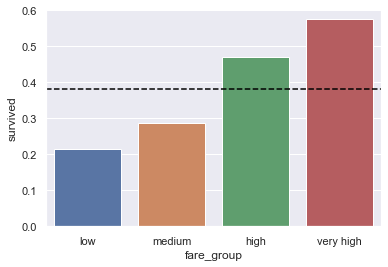

In [40]:
for col in ['age_group', 'fare_group']:
    survival_rate(data, col)

In [41]:
# Create a new feature is called family_size

data['family_size'] = 1 + data['sibsp'] + data['parch']

In [42]:
data['family_size'].value_counts(normalize = True)

1     0.602477
2     0.180180
3     0.114865
4     0.032658
6     0.024775
5     0.016892
7     0.013514
11    0.007883
8     0.006757
Name: family_size, dtype: float64


######## survived & family_size ########
family_size
1     0.300935
2     0.550000
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64


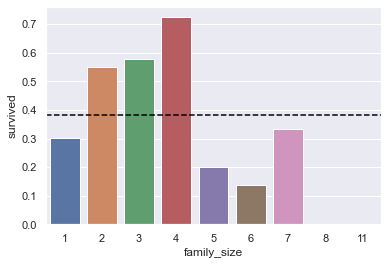

In [43]:
survival_rate(data, 'family_size')

## Q1- How many passengers were alone? What is their Survival Rate ?
* There 537 passengers were alone  and 30% of them survived

## Q2- What are top 3 categories from "family_size" have highest survival Rate ?
* The category that consists of 4 individuals has the highest survival rate (72%), The category that consists of 3 individuals has the second-highest survival rate(58%), and The category that consists of 2 individuals has the third-highest survival rate(55%).

# **Multivariate Analysis**

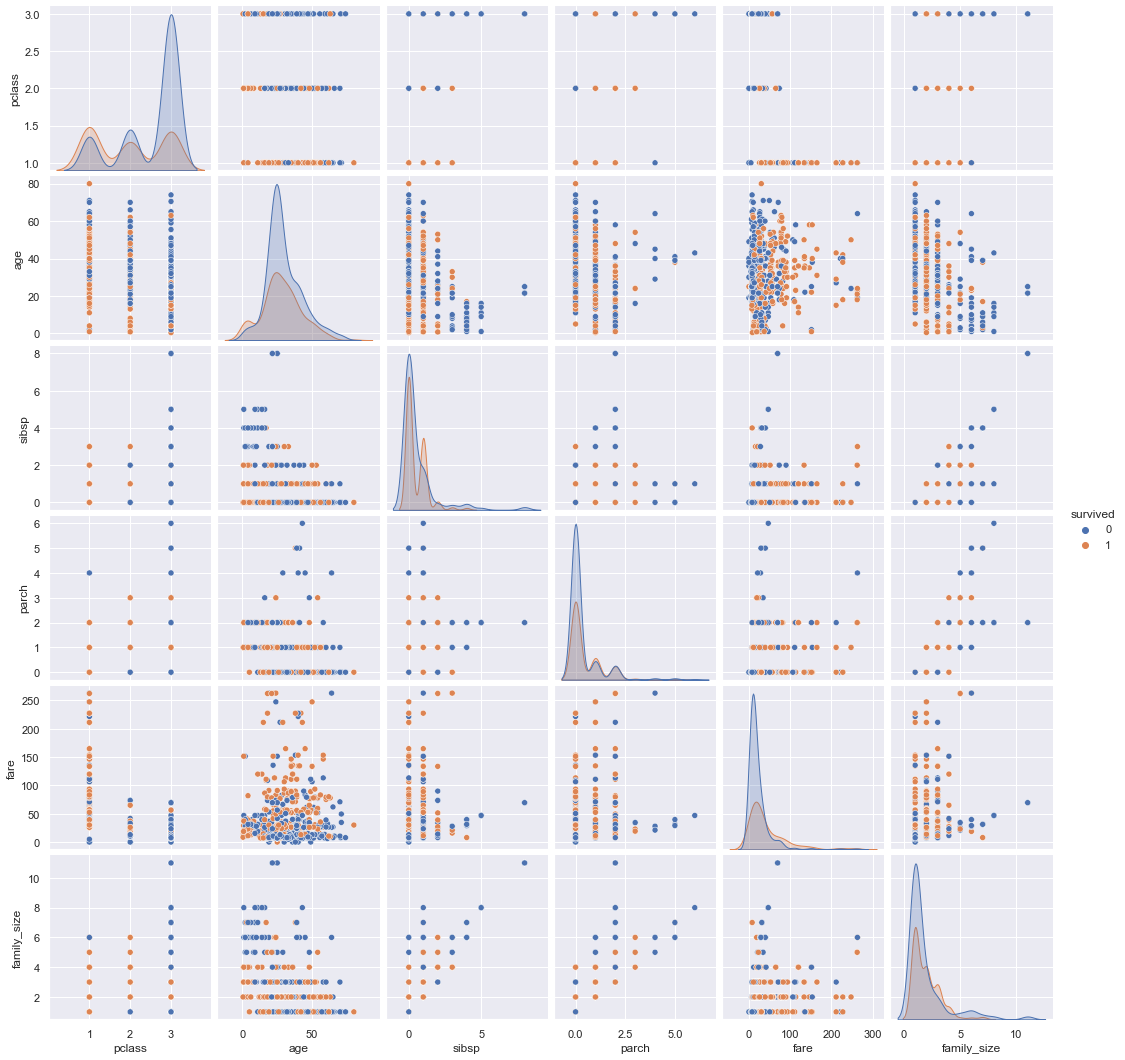

In [44]:
sns.pairplot(data = data, hue = 'survived');

In [45]:
data.corr(numeric_only = True)

,survived,pclass,age,sibsp,parch,fare,family_size
survived,1.000000,-0.334068,-0.061773,-0.033395,0.082157,0.261742,0.018211
pclass,-0.334068,1.000000,-0.412975,0.080937,0.018212,-0.604960,0.064413
age,-0.061773,-0.412975,1.000000,-0.249291,-0.175669,0.129898,-0.258119
sibsp,-0.033395,0.080937,-0.249291,1.000000,0.415141,0.211816,0.890800
parch,0.082157,0.018212,-0.175669,0.415141,1.000000,0.263910,0.783198
fare,0.261742,-0.604960,0.129898,0.211816,0.263910,1.000000,0.276580
family_size,0.018211,0.064413,-0.258119,0.890800,0.783198,0.276580,1.000000


In [46]:
data.corr(numeric_only = True)['survived']

survived       1.000000
pclass        -0.334068
age           -0.061773
sibsp         -0.033395
parch          0.082157
fare           0.261742
family_size    0.018211
Name: survived, dtype: float64

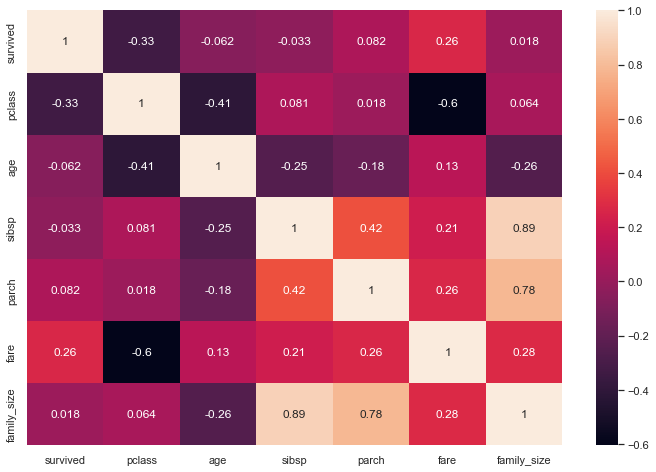

In [47]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(numeric_only = True), annot = True);

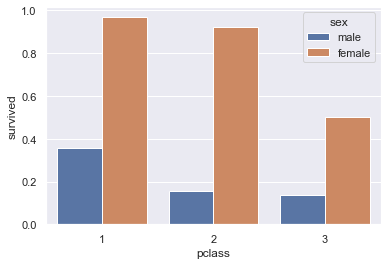

In [48]:
sns.barplot(data = data, x = 'pclass', y = 'survived', hue = 'sex', ci = None);

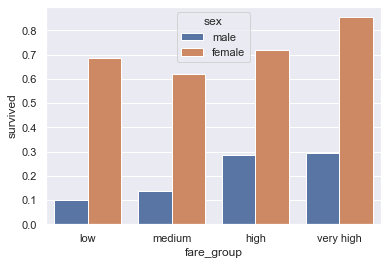

In [49]:
sns.barplot(data=data, x='fare_group', y='survived', hue= 'sex', ci=None);

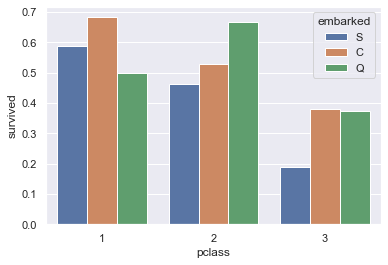

In [50]:
sns.barplot(data=data, x='pclass', y='survived', hue= 'embarked', ci=None);

In [51]:
data.groupby(['sex', 'age_group']).survived.mean()

sex     age_group
female  child        0.666667
        young        0.756757
        adult        0.849315
        senior       0.769231
male    child        0.229630
        young        0.147239
        adult        0.195489
        senior       0.180556
Name: survived, dtype: float64

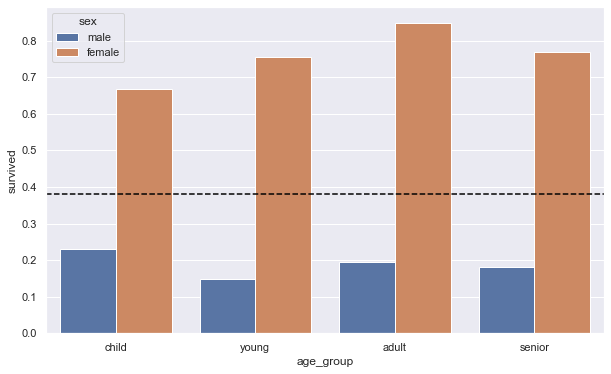

In [52]:
plt.figure(figsize = (10, 6))
sns.barplot(data = data, x = 'age_group', y = 'survived', hue = 'sex', ci = None);
plt.axhline(data.survived.mean(), color = 'black', linestyle = '--');
plt.show()

## Q3- Which age groups has the lowest and highest survival rate for both females and males?
* The adult group has the highest survival rate for females and the child group has the highest survival rate for males.
* The child group has the lowest survival rate for females and the seniors group has the lowest survival rate for males.

# **Conclusion**

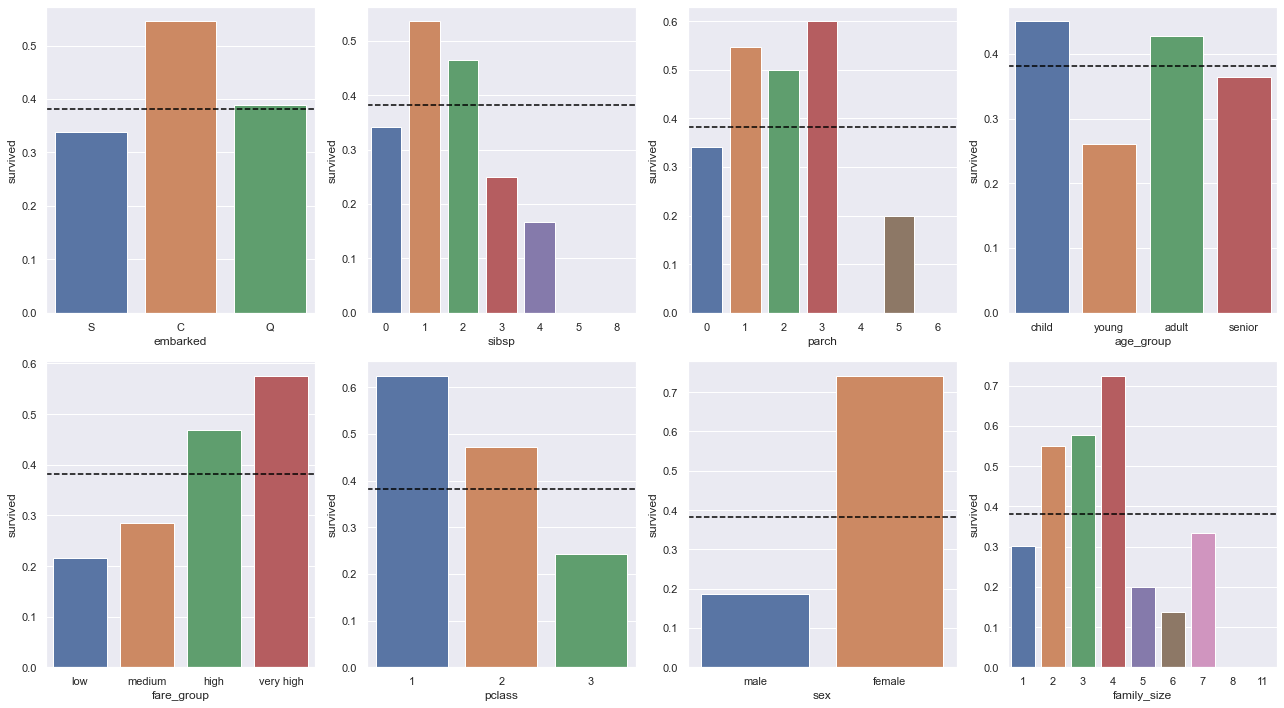

In [53]:
fig, ax = plt.subplots(2, 4, figsize = (18, 10))
for i, col in enumerate(['embarked', 'sibsp', 'parch', 'age_group', 'fare_group', 'pclass', 'sex', 'family_size']):
    sns.barplot(data = data, x = col, y = 'survived', ci = None, ax = ax[i//4, i%4])
    ax[i//4, i%4].axhline(data.survived.mean(), color = 'black', linestyle = '--')

plt.tight_layout()
plt.show()  

# More Analysis

In [54]:
# Split sex into male and female groub

male_data = data[data['sex'] == 'male']
female_data = data[data['sex'] == 'female']

In [55]:
female_data.survived.value_counts(normalize = True)

1    0.741214
0    0.258786
Name: survived, dtype: float64


######## survived & pclass ########
pclass
1    0.967742
2    0.921053
3    0.500000
Name: survived, dtype: float64


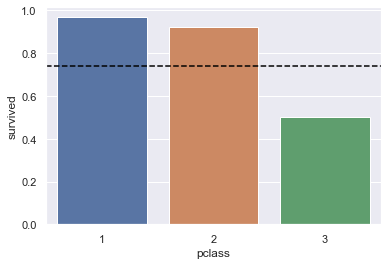

In [56]:
survival_rate(female_data, 'pclass')

In [57]:
male_data.survived.value_counts(normalize = True)

0    0.813913
1    0.186087
Name: survived, dtype: float64


######## survived & pclass ########
pclass
1    0.358333
2    0.157407
3    0.135447
Name: survived, dtype: float64


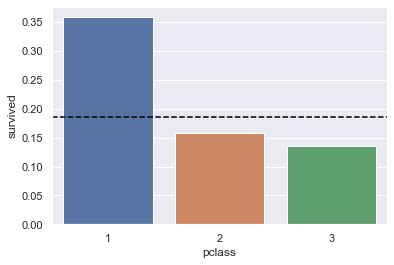

In [58]:
survival_rate(male_data, 'pclass')

In [59]:
data.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.967742
        male      0.358333
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

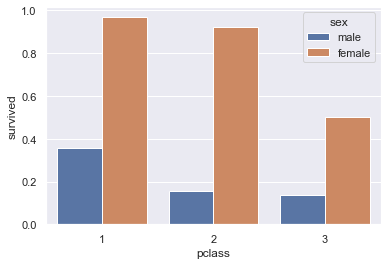

In [60]:
sns.barplot(data = data, x = 'pclass', y = 'survived', hue = 'sex', ci = None);

> ##### **Some Insights:**
* The higher the class, the higher the survival rate
* The higher the fare, the higher the survival rate
* The survival rate for females was higher
